In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
plt.rc('font', family = 'Verdana')
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [22]:
cancer = load_breast_cancer()
X = StandardScaler().fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(X, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Правльность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правльность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правльность на обучающем наборе: 0.988
Правльность на тестовом наборе: 0.986


In [23]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Правльность на обучающем наборе: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Правльность на тестовом наборе: {:.3f}".format(logreg100.score(X_test, y_test)))

Правльность на обучающем наборе: 0.995
Правльность на тестовом наборе: 0.944


c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Правльность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правльность на тестовом наборе: {:.3f}".format(logreg001.score(X_test, y_test)))

Правльность на обучающем наборе: 0.960
Правльность на тестовом наборе: 0.937


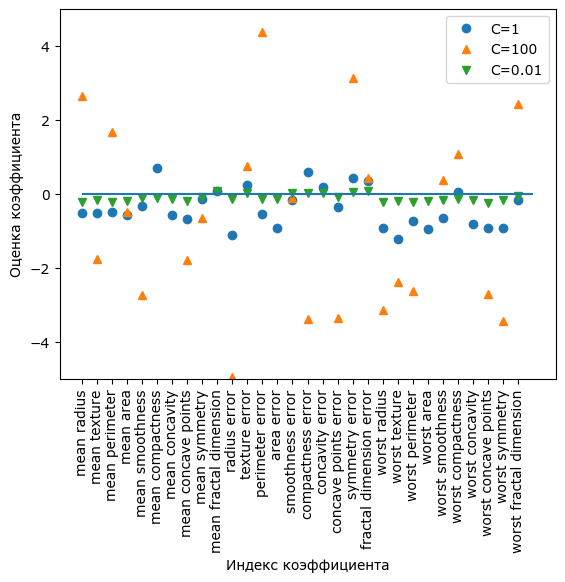

In [25]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()

Правильность на обучение для логистической регрессии l1 с C=0.001 : 0.37
Правильность на тесте для логистической регрессии l1 с C=0.001 : 0.37
Правильность на обучение для логистической регрессии l1 с C=1.000 : 0.99
Правильность на тесте для логистической регрессии l1 с C=1.000 : 0.99
Правильность на обучение для логистической регрессии l1 с C=100.000 : 1.00
Правильность на тесте для логистической регрессии l1 с C=100.000 : 0.94


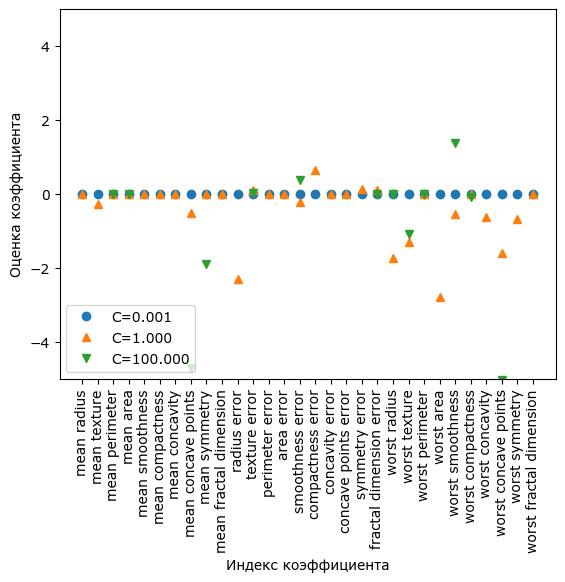

In [30]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1', solver="liblinear", max_iter=100).fit(X_train, y_train)
    print("Правильность на обучение для логистической регрессии l1 с C={:.3f} : {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Правильность на тесте для логистической регрессии l1 с C={:.3f} : {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(-5, 5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend(loc=3)